In [2]:
from IPython.display import HTML
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn
import random
import random
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import matplotlib.colors as mcolors

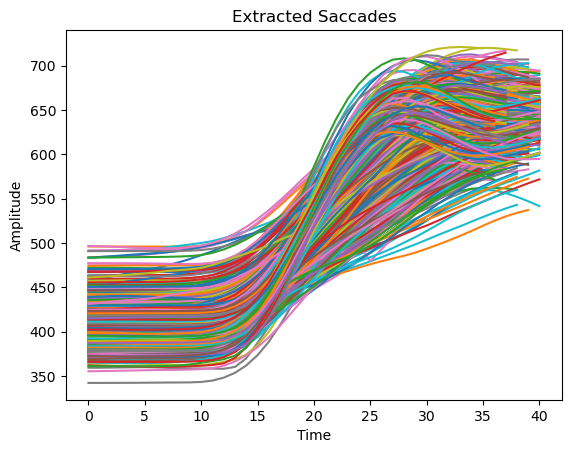

In [3]:
def load(mat_file='/mnt/home/mplomecka/saccades/data/newdata/filteredData_proright_old.mat', channels=[130]):
    # Load the .mat file
    mat = loadmat(mat_file)
    # Extract the saccade_data cell array. Note that this will be a structured numpy array.
    saccade_data = mat[list(mat.keys())[-1]][0]

    # Selectively return the channels of interest omitting all others
    extracted_saccades = []
    for saccade in saccade_data:
        channel_sacs = []
        for channel in channels:
            channel_sacs.append(np.ndarray.tolist(saccade[channel]))
        extracted_saccades.append(np.array(channel_sacs))
    return extracted_saccades

# Call the load function to retrieve the extracted saccades
extracted_saccades = load()

# Plotting the extracted saccades
for channel_saccade in extracted_saccades:
    for channel_data in channel_saccade:
        plt.plot(channel_data)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Extracted Saccades')
plt.show()


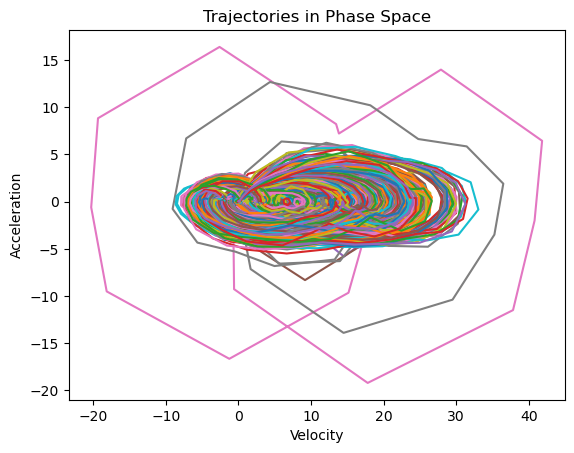

In [4]:
# retrieve the extracted saccades
extracted_saccades = load()

# Plotting the extracted saccades in phase space
for channel_saccade in extracted_saccades:
    for channel_data in channel_saccade:
        velocity = np.gradient(channel_data)
        acceleration = np.gradient(velocity)
        plt.plot(velocity, acceleration)

plt.xlabel('Velocity')
plt.ylabel('Acceleration')
plt.title('Trajectories in Phase Space')
plt.show()


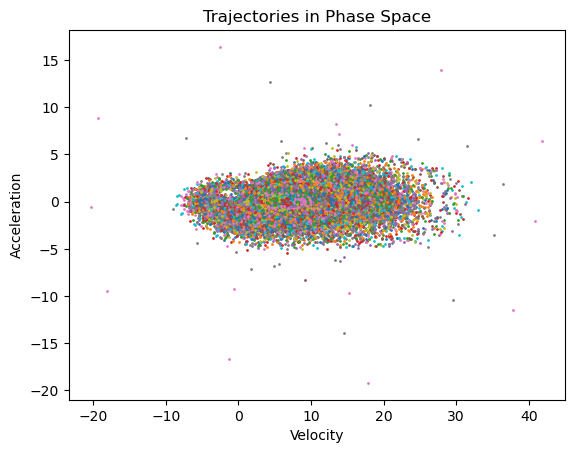

In [5]:
#extracted saccades in phase space with scatter points
for channel_saccade in extracted_saccades:
    for channel_data in channel_saccade:
        velocity = np.gradient(channel_data)
        acceleration = np.gradient(velocity)
        plt.scatter(velocity, acceleration, s=1)

plt.xlabel('Velocity')
plt.ylabel('Acceleration')
plt.title('Trajectories in Phase Space')
plt.show()

below random 100 trajectories

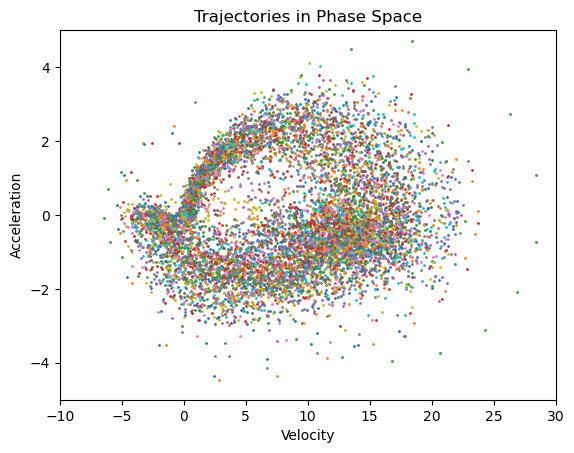

In [6]:
extracted_saccades = load()

random_trajectories = random.sample(extracted_saccades, 300)

for channel_saccade in random_trajectories:
    for channel_data in channel_saccade:
        velocity = np.gradient(channel_data)
        acceleration = np.gradient(velocity)
        plt.scatter(velocity, acceleration, s=1)

plt.xlim(-10, 30)  
plt.ylim(-5, 5)  
plt.xlabel('Velocity')
plt.ylabel('Acceleration')
plt.title('Trajectories in Phase Space')
plt.show()


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

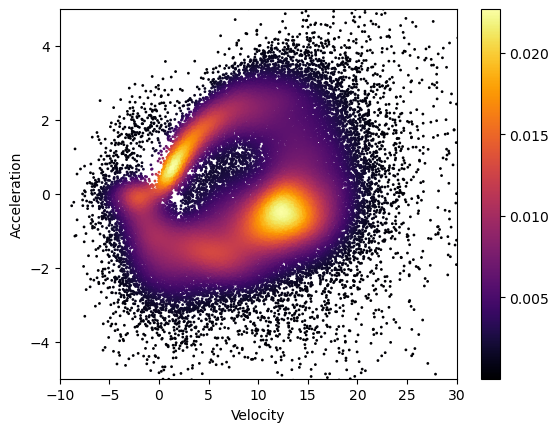

In [7]:
extracted_saccades = load()

random_trajectories = random.sample(extracted_saccades, 2000)

velocity_list = []
acceleration_list = []

for channel_data in random_trajectories:
    velocity = np.diff(channel_data[0][8:])
    acceleration = np.diff(velocity)
    velocity_list.extend(velocity[1:])
    acceleration_list.extend(acceleration)

# kernel density estimation (KDE) plot
x = np.array(velocity_list)
y = np.array(acceleration_list)
kde = gaussian_kde(np.vstack([x, y]))
density = kde(np.vstack([x, y]))

plt.scatter(x, y, c=density, cmap='inferno', s=1)
plt.colorbar()

plt.xlim(-10, 30)
plt.ylim(-5, 5)
plt.xlabel('Velocity')
plt.ylabel('Acceleration')
plt.title


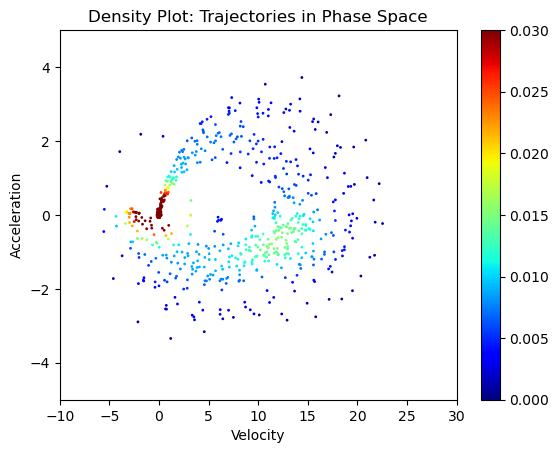

In [11]:
extracted_saccades = load()

random_trajectories = random.sample(extracted_saccades, 20)

velocity_list = []
acceleration_list = []

for channel_data in random_trajectories:
    #velocity = np.gradient(channel_data[0][10:-10])
    velocity = np.gradient(channel_data[0])
    acceleration = np.gradient(velocity)
    velocity_list.extend(velocity)
    acceleration_list.extend(acceleration)

x = np.array(velocity_list)
y = np.array(acceleration_list)
kde = gaussian_kde(np.vstack([x, y]))
density = kde(np.vstack([x, y]))

# Normalize the density values within [0, 0.03]
norm = mcolors.Normalize(vmin=0, vmax=0.03)

plt.scatter(x, y, c=density, cmap=cm.jet, norm=norm, s=1)
plt.colorbar()

plt.xlim(-10, 30)
plt.ylim(-5, 5)
plt.xlabel('Velocity')
plt.ylabel('Acceleration')
plt.title('Density Plot: Trajectories in Phase Space')
plt.show()


In [ ]:

def load(mat_file='/mnt/home/mplomecka/saccades/data/newdata/filteredData_proright_old.mat', channels=[130]):
    # Load the .mat file
    mat = loadmat(mat_file)
    # Extract the saccade_data cell array. Note that this will be a structured numpy array.
    saccade_data = mat[list(mat.keys())[-1]][0]

    # Selectively return the channels of interest omitting all others
    extracted_saccades = []
    for saccade in saccade_data:
        channel_sacs = []
        for channel in channels:
            channel_sacs.append(np.ndarray.tolist(saccade[channel]))
        extracted_saccades.append(np.array(channel_sacs))
    return extracted_saccades

# Call the load function to retrieve the extracted saccades
extracted_saccades = load()

# Calculate mean and standard deviation of the last 5 points for each trajectory
last_5_mean = []
last_5_std = []

for channel_saccade in extracted_saccades:
    for channel_data in channel_saccade:
        last_5_data = channel_data[-5:]
        last_5_mean.append(np.mean(last_5_data))
        last_5_std.append(np.std(last_5_data))

# Calculate quartiles
quartiles = np.percentile(last_5_mean, [25, 50, 75])

# Plot histogram with quartiles
plt.hist(last_5_mean, bins=20, alpha=0.7)
plt.axvline(quartiles[0], color='r', linestyle='--', label='Q1')
plt.axvline(quartiles[1], color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(quartiles[2], color='b', linestyle='--', label='Q3')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Values (Last 5 Points)')
plt.legend()
plt.show()
